# Sentiment analysis. Dataset [Twitter airline sentiment](https://www.kaggle.com/crowdflower/twitter-airline-sentiment)

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
dataset_file = r'F:\Documenti\machine_learning_base\data\twitter_airline_train.csv'

In [3]:
df = pd.read_csv(dataset_file, index_col='tweet_id')

In [4]:
pd.set_option('max_colwidth', 600)
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
568189949415170048,negative,1.0000,Lost Luggage,1.0000,United,NaN,mtezna,NaN,0,"@united Not sure what happened @ MSP yesterday, but VERY UNHAPPY my bag was not only delayed, but sat at MSP for 8 hrs b4 delivery @ 2:30 am",NaN,2015-02-18 15:26:55 -0800,Virginia,Eastern Time (US & Canada)
569509671213662208,negative,0.6724,Customer Service Issue,0.6724,US Airways,NaN,nanceebing,NaN,0,@USAirways I did they are busy,NaN,2015-02-22 06:51:01 -0800,south beach/ LA / NC,Eastern Time (US & Canada)
569601519663906819,negative,1.0000,Late Flight,0.6925,American,NaN,tj_carlson,NaN,0,.@AmericanAir cover a rental car or refund our ticket? - I'll gladly drive 10 hrs home than be stuck here till Tues!,NaN,2015-02-22 12:55:59 -0800,"Brookings, SD",Central Time (US & Canada)
567866540424560640,negative,1.0000,Customer Service Issue,1.0000,US Airways,NaN,symmetrickeys,NaN,0,@USAirways on hold for 1:23. All because they won't let me use a companion voucher online http://t.co/DPhQRgkdoA,NaN,2015-02-17 18:01:48 -0800,NaN,NaN
569248898071580672,negative,0.6687,Can't Tell,0.3575,United,NaN,jorge_guajardo,NaN,1,@united I fly @AmericanAir normally. This doesn't happen to me with them. I'll let your flyers provide their own feedback. Thank you.,NaN,2015-02-21 13:34:48 -0800,"Washington, DC",Alaska


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9232 entries, 568189949415170048 to 567786475262345216
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             9232 non-null   object 
 1   airline_sentiment_confidence  9232 non-null   float64
 2   negativereason                7342 non-null   object 
 3   negativereason_confidence     7611 non-null   float64
 4   airline                       9232 non-null   object 
 5   airline_sentiment_gold        31 non-null     object 
 6   name                          9232 non-null   object 
 7   negativereason_gold           26 non-null     object 
 8   retweet_count                 9232 non-null   int64  
 9   text                          9232 non-null   object 
 10  tweet_coord                   675 non-null    object 
 11  tweet_created                 9232 non-null   object 
 12  tweet_location                6

In [6]:
df['airline_sentiment'].unique()

array(['negative', 'positive'], dtype=object)

## Visualizziamo alcune recensioni

In [7]:
very_negative_tweets = df[(df['airline_sentiment'] == 'negative') & (df['airline_sentiment_confidence'] > 0.99)]; len(very_negative_tweets)

5912

In [8]:
very_negative_tweets['text']

tweet_id
568189949415170048    @united Not sure what happened @ MSP yesterday, but VERY UNHAPPY my bag was not only delayed, but sat at MSP for 8 hrs b4 delivery @ 2:30 am
569601519663906819                            .@AmericanAir cover a rental car or refund our ticket? - I'll gladly drive 10 hrs home than be stuck here till Tues!
567866540424560640                                @USAirways on hold for 1:23. All because they won't let me use a companion voucher online http://t.co/DPhQRgkdoA
568066292114001921                      @USAirways is useless airways. Day 2 trying to get home on standby as a result of their Cancelled Flightlation. #USAirways
568216703055876096                                                              @JetBlue I was believing you for a minute, but we just got delayed for a 3rd time!
                                                                                          ...                                                                     
5696735826090

## Wordcloud

(-0.5, 799.5, 399.5, -0.5)

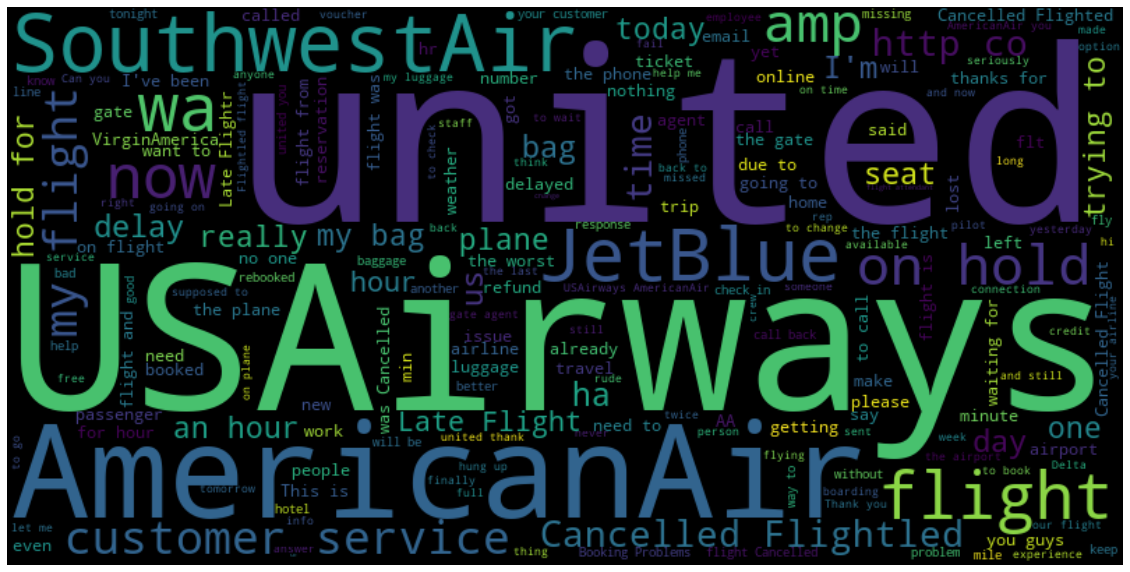

In [9]:
wordcloud = WordCloud(width=800, height=400).generate(' '.join(df[(df['airline_sentiment'] == 'negative')]['text']))
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [10]:
cv = CountVectorizer()
# df['text'].to_numpy()

In [11]:
cv.fit(df['text'])

CountVectorizer()

In [12]:
cv.vocabulary_

{'united': 10292,
 'not': 7040,
 'sure': 9467,
 'what': 10739,
 'happened': 5006,
 'msp': 6769,
 'yesterday': 10997,
 'but': 2409,
 'very': 10518,
 'unhappy': 10283,
 'my': 6804,
 'bag': 1952,
 'was': 10648,
 'only': 7207,
 'delayed': 3408,
 'sat': 8614,
 'at': 1793,
 'for': 4529,
 'hrs': 5281,
 'b4': 1909,
 'delivery': 3426,
 '30': 511,
 'am': 1531,
 'usairways': 10424,
 'did': 3532,
 'they': 9741,
 'are': 1709,
 'busy': 2408,
 'americanair': 1547,
 'cover': 3154,
 'rental': 8263,
 'car': 2514,
 'or': 7243,
 'refund': 8179,
 'our': 7285,
 'ticket': 9800,
 'll': 6185,
 'gladly': 4797,
 'drive': 3768,
 '10': 39,
 'home': 5195,
 'than': 9683,
 'be': 2027,
 'stuck': 9371,
 'here': 5120,
 'till': 9812,
 'tues': 10051,
 'on': 7190,
 'hold': 5178,
 '23': 390,
 'all': 1489,
 'because': 2048,
 'won': 10861,
 'let': 6088,
 'me': 6492,
 'use': 10436,
 'companion': 2926,
 'voucher': 10576,
 'online': 7206,
 'http': 5286,
 'co': 2837,
 'dphqrgkdoa': 3743,
 'fly': 4480,
 'normally': 7030,
 'this': 

In [13]:
cv.get_feature_names()[:10]

['00',
 '000',
 '000419',
 '000ft',
 '000lbs',
 '0016',
 '00a',
 '00am',
 '00p',
 '00pm']

In [14]:
vector = cv.transform(df['text'])

In [15]:
vector[0]

<1x11079 sparse matrix of type '<class 'numpy.int64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [16]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer

In [17]:
clf = MultinomialNB()

In [18]:
clf.fit(cv.transform(df['text']), df['airline_sentiment'])

MultinomialNB()

In [19]:
clf.score(cv.transform(df['text']), df['airline_sentiment'])

0.9418327556325823

In [20]:
import spacy

In [25]:
import spacy
nlp = spacy.load('en_core_web_sm')

doc = nlp(u"Apples and oranges are similar. Boots and hippos aren't.")

for token in doc:
    print(token, token.lemma, token.lemma_)

Apples 8566208034543834098 <class 'str'>
and 2283656566040971221 <class 'str'>
oranges 2208928596161743350 <class 'str'>
are 10382539506755952630 <class 'str'>
similar 18166476740537071113 <class 'str'>
. 12646065887601541794 <class 'str'>
Boots 9918665227421442029 <class 'str'>
and 2283656566040971221 <class 'str'>
hippos 4133693291145879083 <class 'str'>
are 10382539506755952630 <class 'str'>
n't 447765159362469301 <class 'str'>
. 12646065887601541794 <class 'str'>


In [23]:
from spacy.lang.en.stop_words import STOP_WORDS

In [24]:
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron